<a href="https://colab.research.google.com/github/bhanureddyko/F1-Data-Analysis/blob/main/F1%20Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


📋 Career Summary for Lewis Hamilton
Total Points: 51153.5
Total Wins: 105
Total Podiums: 202
Fastest Laps: 0



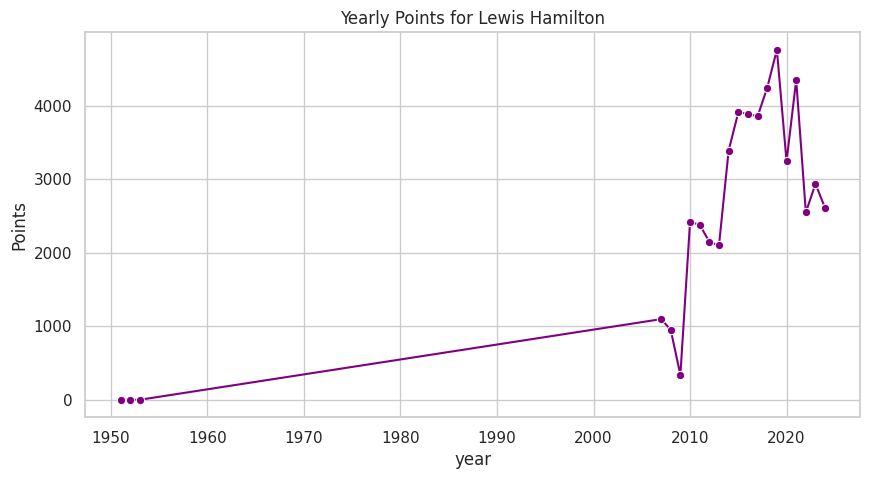

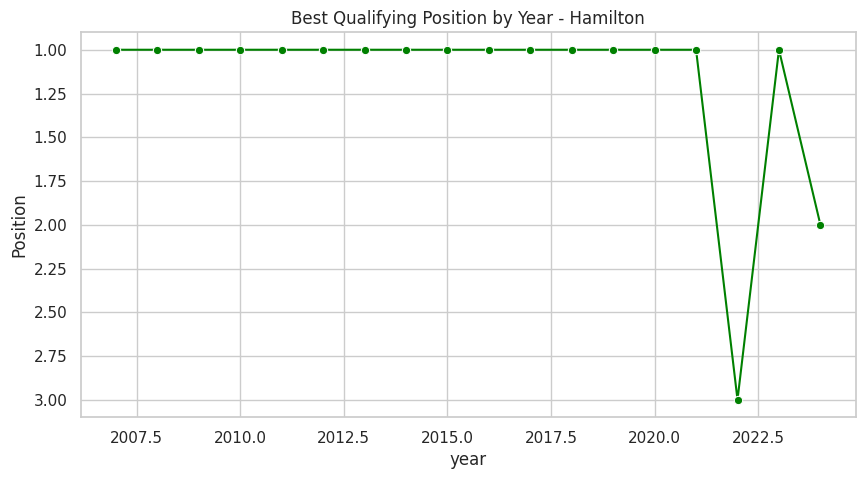

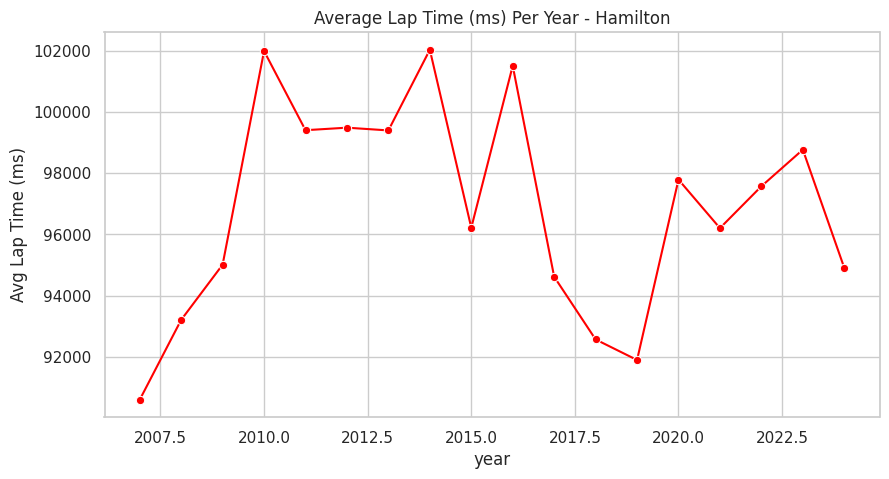

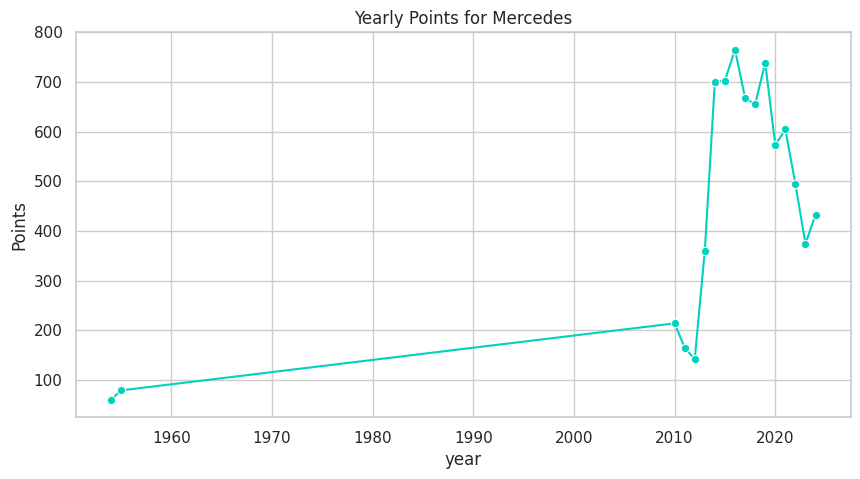

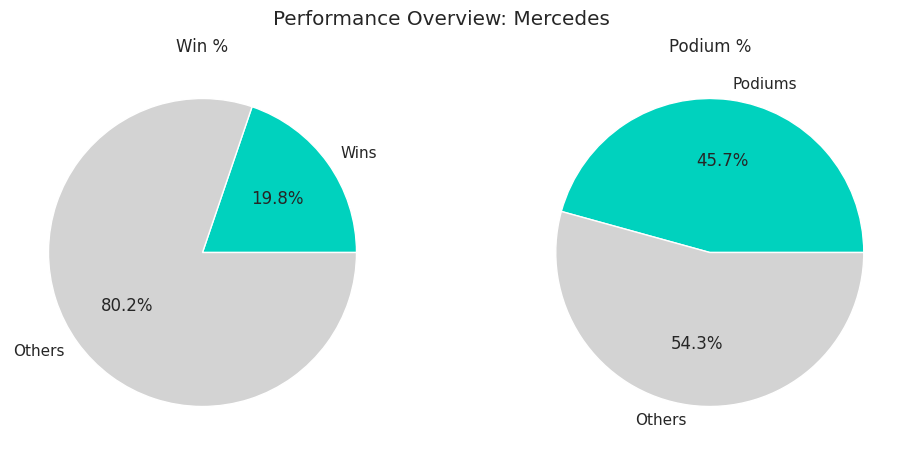

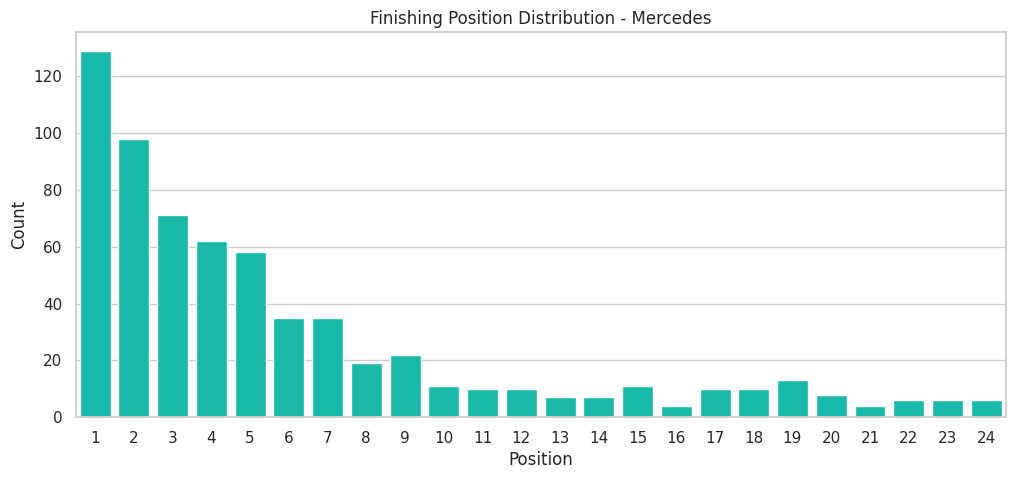

In [10]:
# Install required libraries
!pip install pandas matplotlib seaborn --quiet

# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme
sns.set(style="whitegrid")

# Load data
drivers = pd.read_csv('/content/drivers.csv')
driver_standings = pd.read_csv('/content/driver_standings.csv')
constructors = pd.read_csv('/content/constructors.csv')
constructor_standings = pd.read_csv('/content/constructor_standings.csv')
constructor_results = pd.read_csv('//content/constructor_results.csv')
races = pd.read_csv('//content/races.csv')
results = pd.read_csv('/content/results.csv')
qualifying = pd.read_csv('/content/qualifying.csv')
lap_times = pd.read_csv('/content/lap_times.csv')

# Basic setup
races_year = races[['raceId', 'year', 'name']]

# Merge driver info
driver_data = driver_standings.merge(races_year, on='raceId')
driver_data = driver_data.merge(drivers[['driverId', 'surname', 'forename']], on='driverId')
results_data = results.merge(races_year, on='raceId')
results_data = results_data.merge(drivers[['driverId', 'surname', 'forename']], on='driverId')

# Merge constructor info
constructor_data = constructor_standings.merge(races_year, on='raceId')
constructor_data = constructor_data.merge(constructors[['constructorId', 'name']], on='constructorId')

# Optional: Constructor color map
constructor_colors = {
    'Mercedes': '#00D2BE',
    'Red Bull': '#1E41FF',
    'Ferrari': '#DC0000',
    'McLaren': '#FF8700',
    'Alpine F1 Team': '#0090FF',
    'Aston Martin': '#006F62',
    'AlphaTauri': '#2B4562',
    'Alfa Romeo': '#900000',
    'Williams': '#005AFF',
    'Haas F1 Team': '#B6BABD'
}

# DRIVER ANALYSIS FUNCTION
def analyze_driver(surname):
    full_name = drivers[drivers['surname'] == surname][['forename', 'surname']].agg(' '.join, axis=1).values[0]
    df = results_data[results_data['surname'] == surname]

    if df.empty:
        print(f"No data found for driver: {surname}")
        return

    # Career Summary
    wins = df[df['positionOrder'] == 1].shape[0]
    podiums = df[df['positionOrder'] <= 3].shape[0]
    fastest_laps = df[df['rank'] == 1].shape[0]
    points = driver_data[driver_data['surname'] == surname]['points'].sum()

    print(f"\n📋 Career Summary for {full_name}")
    print(f"Total Points: {points:.1f}")
    print(f"Total Wins: {wins}")
    print(f"Total Podiums: {podiums}")
    print(f"Fastest Laps: {fastest_laps}\n")

    # Yearly trend
    yearly_stats = driver_data[driver_data['surname'] == surname].groupby('year')[['points']].sum().reset_index()
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=yearly_stats, x='year', y='points', marker='o', color='purple')
    plt.title(f'Yearly Points for {full_name}')
    plt.ylabel("Points")
    plt.grid(True)
    plt.show()

def analyze_constructor(name):
    # Merge constructor info into results
    df = results.merge(constructors[['constructorId', 'name']], on='constructorId')
    df = df.merge(races[['raceId', 'year']], on='raceId')

    # Filter constructor by name (case insensitive)
    df = df[df['name'].str.lower() == name.lower()]

    if df.empty:
        print(f"No data found for constructor: {name}")
        return

    # Yearly points trend
    yearly = df.groupby('year')['points'].sum().reset_index()
    color = constructor_colors.get(name, 'grey')

    plt.figure(figsize=(10, 5))
    sns.lineplot(data=yearly, x='year', y='points', marker='o', color=color)
    plt.title(f'Yearly Points for {name}')
    plt.ylabel('Points')
    plt.grid(True)
    plt.show()

    # Podium & win breakdown
    wins = df[df['positionOrder'] == 1].shape[0]
    podiums = df[df['positionOrder'] <= 3].shape[0]
    others = df.shape[0] - podiums

    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    ax[0].pie([wins, df.shape[0] - wins], labels=['Wins', 'Others'], autopct='%1.1f%%', colors=[color, 'lightgrey'])
    ax[0].set_title('Win %')

    ax[1].pie([podiums, others], labels=['Podiums', 'Others'], autopct='%1.1f%%', colors=[color, 'lightgrey'])
    ax[1].set_title('Podium %')

    plt.suptitle(f'Performance Overview: {name}')
    plt.show()

    # Bar chart for positions
    pos_count = df['positionOrder'].value_counts().sort_index()
    plt.figure(figsize=(12, 5))
    sns.barplot(x=pos_count.index, y=pos_count.values, color=color)
    plt.title(f'Finishing Position Distribution - {name}')
    plt.xlabel("Position")
    plt.ylabel("Count")
    plt.show()

# QUALIFYING ANALYSIS (Optional)
def best_qualifying(driver_surname):
    driver_id = drivers[drivers['surname'] == driver_surname]['driverId'].values[0]
    df = qualifying[qualifying['driverId'] == driver_id]
    df = df.merge(races_year, on='raceId')

    if df.empty:
        print(f"No qualifying data found for {driver_surname}")
        return

    positions = df.groupby('year')['position'].min().reset_index()
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=positions['year'], y=positions['position'], marker='o', color='green')
    plt.title(f'Best Qualifying Position by Year - {driver_surname}')
    plt.ylabel("Position")
    plt.gca().invert_yaxis()
    plt.grid(True)
    plt.show()

# DRIVER LAP TIME ANALYSIS (Optional heavy operation)
def fastest_laps(driver_surname):
    driver_id = drivers[drivers['surname'] == driver_surname]['driverId'].values[0]
    df = lap_times[lap_times['driverId'] == driver_id]
    df = df.merge(races_year, on='raceId')
    avg_lap = df.groupby('year')['milliseconds'].mean().reset_index()

    plt.figure(figsize=(10, 5))
    sns.lineplot(data=avg_lap, x='year', y='milliseconds', marker='o', color='red')
    plt.title(f'Average Lap Time (ms) Per Year - {driver_surname}')
    plt.ylabel("Avg Lap Time (ms)")
    plt.grid(True)
    plt.show()

# 🧪 EXAMPLE USAGE

# Driver
analyze_driver('Hamilton')        # Example: Lewis Hamilton
best_qualifying('Hamilton')
fastest_laps('Hamilton')

# Constructor
analyze_constructor('Mercedes')   # Example: Mercedes


In [3]:
def top_drivers_by_wins(top_n=10):
    df = results.merge(drivers[['driverId', 'surname', 'forename']], on='driverId')
    wins_df = df[df['positionOrder'] == 1]

    # Combine forename and surname
    wins_df['driver_name'] = wins_df['forename'] + ' ' + wins_df['surname']

    # Count wins
    win_count = wins_df['driver_name'].value_counts().head(top_n).sort_values(ascending=True)

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=win_count.values, y=win_count.index, palette='crest')
    plt.title(f'Top {top_n} Drivers by Wins')
    plt.xlabel('Number of Wins')
    plt.ylabel('Driver')
    plt.grid(axis='x')
    plt.show()


In [4]:
def top_constructors_by_wins(top_n=10):
    df = results.merge(constructors[['constructorId', 'name']], on='constructorId')
    wins_df = df[df['positionOrder'] == 1]

    # Count wins per constructor
    constructor_win_counts = wins_df['name'].value_counts().head(top_n).sort_values(ascending=True)

    # Colors (use known team colors, fallback to seaborn palette)
    colors = [constructor_colors.get(name, color) for name, color in zip(constructor_win_counts.index, sns.color_palette("tab10", n_colors=top_n))]

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=constructor_win_counts.values, y=constructor_win_counts.index, palette=colors)
    plt.title(f'Top {top_n} Constructors by Wins')
    plt.xlabel('Number of Wins')
    plt.ylabel('Constructor')
    plt.grid(axis='x')
    plt.show()


In [5]:
def races_over_time():
    races_per_year = races.groupby('year').size().reset_index(name='race_count')

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=races_per_year, x='year', y='race_count', marker='o', linewidth=2.5, color='dodgerblue')
    plt.title('Number of F1 Races Per Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Races')
    plt.grid(True)
    plt.xticks(races_per_year['year'][::2], rotation=45)  # show every 2nd year
    plt.tight_layout()
    plt.show()



In [6]:
def estimate_avg_pitstops():
    print("Estimating average pitstops per driver per race per year...")

    # Load and merge lap time data with race years
    df = lap_times.merge(races[['raceId', 'year']], on='raceId')

    # Estimate pitstops using large time jumps between laps
    def estimate_pitstops(driver_laps):
        lap_diff = driver_laps['milliseconds'].diff().fillna(0)
        # If lap is significantly slower than average (e.g., >8 seconds slower), count it
        avg_lap = driver_laps['milliseconds'].mean()
        pit_laps = (lap_diff > 8000).sum()
        return pit_laps

    pitstop_summary = df.groupby(['raceId', 'driverId', 'year']).apply(estimate_pitstops).reset_index(name='pitstops')

    # Average pitstops per race per year
    avg_pitstops = pitstop_summary.groupby('year')['pitstops'].mean().reset_index()

    # Plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=avg_pitstops, x='year', y='pitstops', marker='o', color='firebrick')
    plt.title('Estimated Average Pitstops per Driver per Race (Yearly)')
    plt.xlabel('Year')
    plt.ylabel('Avg Pitstops')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [7]:
def fastest_lap_time_analysis():
    print("Analyzing fastest lap times across seasons...")

    # Merge lap times with race year
    lap_with_year = lap_times.merge(races[['raceId', 'year']], on='raceId')

    # Get the fastest lap time per race
    fastest_per_race = lap_with_year.groupby('raceId')['milliseconds'].min().reset_index()
    fastest_per_race = fastest_per_race.merge(races[['raceId', 'year']], on='raceId')

    # Average of fastest laps each season
    fastest_avg_year = fastest_per_race.groupby('year')['milliseconds'].mean().reset_index()

    # Plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=fastest_avg_year, x='year', y='milliseconds', marker='o', color='darkgreen')
    plt.title('Average of Fastest Lap Times per Race by Year')
    plt.ylabel('Milliseconds (Avg Fastest Lap)')
    plt.xlabel('Year')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [12]:
def driver_career_summary_table(top_n=20):
    print(f"Displaying top {top_n} drivers by total points...")

    # Merge results with driver & race data
    df = results.merge(drivers[['driverId', 'forename', 'surname']], on='driverId')
    df = df.merge(races[['raceId', 'year']], on='raceId')
    df['driver_name'] = df['forename'] + ' ' + df['surname']

    # Total Wins
    wins = df[df['positionOrder'] == 1].groupby('driver_name').size().rename('Wins')

    # Podiums
    podiums = df[df['positionOrder'] <= 3].groupby('driver_name').size().rename('Podiums')

    # Fastest Laps
    flaps = df[df['rank'] == 1].groupby('driver_name').size().rename('Fastest Laps')

    # Total Points
    points = driver_standings.merge(drivers[['driverId', 'forename', 'surname']], on='driverId')
    points['driver_name'] = points['forename'] + ' ' + points['surname']
    total_points = points.groupby('driver_name')['points'].sum().rename('Points')

    # Combine all into one table
    summary = pd.concat([total_points, wins, podiums, flaps], axis=1).fillna(0).sort_values(by='Points', ascending=False)
    summary[['Wins', 'Podiums', 'Fastest Laps']] = summary[['Wins', 'Podiums', 'Fastest Laps']].astype(int)
    summary = summary.head(top_n)

    return summary.reset_index()


In [13]:
summary_table = driver_career_summary_table(15)
display(summary_table)


Displaying top 15 drivers by total points...


,driver_name,Points,Wins,Podiums,Fastest Laps
0,Lewis Hamilton,51153.5,105,202,0
1,Max Verstappen,32849.5,63,112,0
2,Sebastian Vettel,32026.0,53,122,0
3,Fernando Alonso,24579.0,32,106,0
4,Valtteri Bottas,19541.0,10,67,0
5,Kimi Räikkönen,19069.0,21,103,0
6,Sergio Pérez,18893.0,6,39,0
7,Nico Rosberg,16910.0,23,57,0
8,Charles Leclerc,16024.0,8,43,0
9,Michael Schumacher,14514.0,91,155,0


In [14]:
def display_lap_times(sample_size=10):
    """
    Display a sample of lap_times data with driver and race info.

    sample_size: Number of rows to display.
    """
    # Merge with drivers and races for better readability
    df = lap_times.merge(drivers[['driverId', 'forename', 'surname']], on='driverId', how='left')
    df = df.merge(races[['raceId', 'year', 'name']], on='raceId', how='left')

    # Create full driver name
    df['driver_name'] = df['forename'] + ' ' + df['surname']

    # Select and rename columns for clarity
    df_display = df[['year', 'name', 'driver_name', 'lap', 'position', 'time', 'milliseconds']]
    df_display.columns = ['Year', 'Race', 'Driver', 'Lap', 'Position', 'Lap Time', 'Milliseconds']

    return df_display.head(sample_size)


In [15]:
lap_sample = display_lap_times(15)
display(lap_sample)


,Year,Race,Driver,Lap,Position,Lap Time,Milliseconds
0,2011,Australian Grand Prix,Sebastian Vettel,1,1,1:38.109,98109
1,2011,Australian Grand Prix,Sebastian Vettel,2,1,1:33.006,93006
2,2011,Australian Grand Prix,Sebastian Vettel,3,1,1:32.713,92713
3,2011,Australian Grand Prix,Sebastian Vettel,4,1,1:32.803,92803
4,2011,Australian Grand Prix,Sebastian Vettel,5,1,1:32.342,92342
5,2011,Australian Grand Prix,Sebastian Vettel,6,1,1:32.605,92605
6,2011,Australian Grand Prix,Sebastian Vettel,7,1,1:32.502,92502
7,2011,Australian Grand Prix,Sebastian Vettel,8,1,1:32.537,92537
8,2011,Australian Grand Prix,Sebastian Vettel,9,1,1:33.240,93240
9,2011,Australian Grand Prix,Sebastian Vettel,10,1,1:32.572,92572


In [16]:
def display_constructor_standings(sample_size=10):
    """
    Display constructor standings joined with constructor names and race years.

    sample_size: Number of rows to display.
    """
    # Merge with constructor and race data
    df = constructor_standings.merge(constructors[['constructorId', 'name']], on='constructorId', how='left')
    df = df.merge(races[['raceId', 'year', 'name']], on='raceId', how='left')

    # Select and rename for clarity
    df_display = df[['year', 'name_x', 'name_y', 'points', 'wins', 'position']]
    df_display.columns = ['Year', 'Race', 'Constructor', 'Points', 'Wins', 'Position']

    return df_display.head(sample_size)


In [17]:
constructor_sample = display_constructor_standings(15)
display(constructor_sample)


,Year,Race,Constructor,Points,Wins,Position
0,2008,McLaren,Australian Grand Prix,14.0,1,1
1,2008,BMW Sauber,Australian Grand Prix,8.0,0,3
2,2008,Williams,Australian Grand Prix,9.0,0,2
3,2008,Renault,Australian Grand Prix,5.0,0,4
4,2008,Toro Rosso,Australian Grand Prix,2.0,0,5
5,2008,Ferrari,Australian Grand Prix,1.0,0,6
6,2008,McLaren,Malaysian Grand Prix,24.0,1,1
7,2008,BMW Sauber,Malaysian Grand Prix,19.0,0,2
8,2008,Williams,Malaysian Grand Prix,9.0,0,4
9,2008,Renault,Malaysian Grand Prix,6.0,0,5


In [18]:
def display_race_results(sample_size=10):
    """
    Display race results joined with driver, constructor, and race info.

    sample_size: Number of rows to display.
    """
    # Merge driver, constructor, and race info
    df = results.merge(drivers[['driverId', 'forename', 'surname']], on='driverId', how='left')
    df = df.merge(constructors[['constructorId', 'name']], on='constructorId', how='left')
    df = df.merge(races[['raceId', 'year', 'name']], on='raceId', how='left')

    # Create driver full name
    df['driver_name'] = df['forename'] + ' ' + df['surname']

    # Select relevant columns
    df_display = df[['year', 'name_y', 'driver_name', 'name_x', 'grid', 'positionOrder', 'points', 'rank']]
    df_display.columns = ['Year', 'Race', 'Driver', 'Constructor', 'Grid Position', 'Finish Position', 'Points', 'Fastest Lap Rank']

    return df_display.head(sample_size)


In [19]:
race_results_sample = display_race_results(15)
display(race_results_sample)


,Year,Race,Driver,Constructor,Grid Position,Finish Position,Points,Fastest Lap Rank
0,2008,Australian Grand Prix,Lewis Hamilton,McLaren,1,1,10.0,2
1,2008,Australian Grand Prix,Nick Heidfeld,BMW Sauber,5,2,8.0,3
2,2008,Australian Grand Prix,Nico Rosberg,Williams,7,3,6.0,5
3,2008,Australian Grand Prix,Fernando Alonso,Renault,11,4,5.0,7
4,2008,Australian Grand Prix,Heikki Kovalainen,McLaren,3,5,4.0,1
5,2008,Australian Grand Prix,Kazuki Nakajima,Williams,13,6,3.0,14
6,2008,Australian Grand Prix,Sébastien Bourdais,Toro Rosso,17,7,2.0,8
7,2008,Australian Grand Prix,Kimi Räikkönen,Ferrari,15,8,1.0,4
8,2008,Australian Grand Prix,Robert Kubica,BMW Sauber,2,9,0.0,9
9,2008,Australian Grand Prix,Timo Glock,Toyota,18,10,0.0,13
